In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
!pip install -U git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git


#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas as pd#gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

  Cloning https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to /tmp/pip-req-build-vkkp54by
  Running command git clone --filter=blob:none --quiet https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git /tmp/pip-req-build-vkkp54by
  Resolved https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to commit b17a265d3b8253424e5b38872457f7437909a65d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:


file_path = '/content/drive/MyDrive/MA_Thesis/DBCommunity/saved_data/modeling_data_final_2.xlsx'

df = pd.read_excel(file_path)

df

,Title,Post_ID,Text,Author,Author_ID,Reply,LastReply,PublishTime,Like,Collect,...,Research_Advice,Emotional,positive_intensity,negative_intensity,positive_intensity_code,negative_intensity_code,PostCount_total,ReplyCount_total,Provide,Success
0,精华\n\n\n \n ...,1,由猴面包树组员倡议，我们小组建立官方slack交流群啦！为了营造一个更友好安全的交流氛围，目...,Anon加重音,1,1115,2023-12-21,2020-10-09,2,4,...,0,0,1.000000,0.01,0,0,27,1627,1,1
1,精华\n\n\n \n ...,2,—————————本帖为问卷调查、招募研究对象的集中贴，姐妹们如有问卷调查需要大家帮忙填写或...,Anon加重音,1,64,2023-12-01,2020-10-14,1,2,...,1,0,0.010000,1.00,0,0,27,1627,1,1
2,精华\n\n\n \n ...,3,前情(意见征集贴) https://www.douban.com/group/topic/1...,Anon加重音,1,12,2023-07-04,2020-10-10,4,6,...,0,1,1.000000,0.01,0,0,27,1627,1,1
3,精华\n\n\n \n ...,4,论坛第二期分享会她说PhD：不同的人生路径的文字稿和音频分享来啦。非常感谢小组长们的全力支持...,Sophie,2,2,2023-05-03,2020-11-02,1,6,...,1,0,0.999941,0.01,0,0,6,88,1,0
4,精华\n\n\n \n ...,5,09/30/21更新: 管理员实在是没有能力及时追踪所有申请相关的帖子，大家有相关的帖子想要...,丸子,3,6,2023-03-25,2020-12-09,2,2,...,1,0,0.010000,1.00,0,1,8,136,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4328,你认为最有用的mailing list,4329,每个field/area都有自己不同的mailing list，很多导师都会通过这个mail...,Magritte,351,1,2020-09-21,2020-09-20,3,7,...,1,0,0.620534,0.01,0,0,6,56,1,0
4329,遇到hands off的导师如何选题并开展project？,4330,本科时的老板和他高年级phd带我比较hands on一点，所以选题和细节都可以得到很详细的建...,Anon加重音,1,7,2020-09-19,2020-09-18,1,7,...,1,1,0.997816,0.01,0,0,27,1627,0,1
4330,分享一个本领域senior的采访内容,4331,这位前辈人非常好，成果很多，采访内容里虽然不少是本领域specific，但是其中关于pick...,路亦槑,2087,1,2020-09-19,2020-09-19,6,2,...,1,0,0.988028,0.01,0,0,3,45,1,0
4331,精华\n\n\n \n ...,4332,组里真是人才济济呀，为了更好地整合与利用资源，将所有AMA帖子集合在这里，方便大家交流学习P...,Anon加重音,1,0,2020-09-19,2020-09-19,3,2,...,1,0,0.999986,0.01,0,0,27,1627,1,1


In [4]:
df.dtypes

,0
Title,object
Post_ID,int64
Text,object
Author,object
Author_ID,int64
Reply,int64
LastReply,datetime64[ns]
PublishTime,datetime64[ns]
Like,int64
Collect,int64


In [5]:
# prompt: add a column called "sentiment_intensity" which takes the larger value of positive_intensity and negative_intensity

df['sentiment_intensity'] = df[['positive_intensity', 'negative_intensity']].max(axis=1)
df

,Title,Post_ID,Text,Author,Author_ID,Reply,LastReply,PublishTime,Like,Collect,...,Emotional,positive_intensity,negative_intensity,positive_intensity_code,negative_intensity_code,PostCount_total,ReplyCount_total,Provide,Success,sentiment_intensity
0,精华\n\n\n \n ...,1,由猴面包树组员倡议，我们小组建立官方slack交流群啦！为了营造一个更友好安全的交流氛围，目...,Anon加重音,1,1115,2023-12-21,2020-10-09,2,4,...,0,1.000000,0.01,0,0,27,1627,1,1,1.000000
1,精华\n\n\n \n ...,2,—————————本帖为问卷调查、招募研究对象的集中贴，姐妹们如有问卷调查需要大家帮忙填写或...,Anon加重音,1,64,2023-12-01,2020-10-14,1,2,...,0,0.010000,1.00,0,0,27,1627,1,1,1.000000
2,精华\n\n\n \n ...,3,前情(意见征集贴) https://www.douban.com/group/topic/1...,Anon加重音,1,12,2023-07-04,2020-10-10,4,6,...,1,1.000000,0.01,0,0,27,1627,1,1,1.000000
3,精华\n\n\n \n ...,4,论坛第二期分享会她说PhD：不同的人生路径的文字稿和音频分享来啦。非常感谢小组长们的全力支持...,Sophie,2,2,2023-05-03,2020-11-02,1,6,...,0,0.999941,0.01,0,0,6,88,1,0,0.999941
4,精华\n\n\n \n ...,5,09/30/21更新: 管理员实在是没有能力及时追踪所有申请相关的帖子，大家有相关的帖子想要...,丸子,3,6,2023-03-25,2020-12-09,2,2,...,0,0.010000,1.00,0,1,8,136,1,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4328,你认为最有用的mailing list,4329,每个field/area都有自己不同的mailing list，很多导师都会通过这个mail...,Magritte,351,1,2020-09-21,2020-09-20,3,7,...,0,0.620534,0.01,0,0,6,56,1,0,0.620534
4329,遇到hands off的导师如何选题并开展project？,4330,本科时的老板和他高年级phd带我比较hands on一点，所以选题和细节都可以得到很详细的建...,Anon加重音,1,7,2020-09-19,2020-09-18,1,7,...,1,0.997816,0.01,0,0,27,1627,0,1,0.997816
4330,分享一个本领域senior的采访内容,4331,这位前辈人非常好，成果很多，采访内容里虽然不少是本领域specific，但是其中关于pick...,路亦槑,2087,1,2020-09-19,2020-09-19,6,2,...,0,0.988028,0.01,0,0,3,45,1,0,0.988028
4331,精华\n\n\n \n ...,4332,组里真是人才济济呀，为了更好地整合与利用资源，将所有AMA帖子集合在这里，方便大家交流学习P...,Anon加重音,1,0,2020-09-19,2020-09-19,3,2,...,0,0.999986,0.01,0,0,27,1627,1,1,0.999986


In [6]:
df.columns

Index(['Title', 'Post_ID', 'Text', 'Author', 'Author_ID', 'Reply', 'LastReply',
       'PublishTime', 'Like', 'Collect', 'Repost', 'Length', 'sentiment_label',
       'sentiment_score', 'PostCount', 'ReplyCount', 'male_excluded',
       'In_Replies', 'Out_Replies', 'In_Betweenness', 'Out_Betweenness',
       'Reply_Bin', 'Feminism', 'Research_Advice', 'Emotional',
       'positive_intensity', 'negative_intensity', 'positive_intensity_code',
       'negative_intensity_code', 'PostCount_total', 'ReplyCount_total',
       'Provide', 'Success', 'sentiment_intensity'],
      dtype='object')

# XGBoost

Why XGBoost?

- Handles Imbalanced Data: XGBoost allows you to adjust scale_pos_weight to balance classes.

- Resilient to Outliers: Tree-based algorithms are robust to extreme values.

- Captures Non-linearity: XGBoost models complex, non-linear relationships effectively.

- Feature Importance & Interpretability: SHAP values can be used for detailed interpretation.

In [7]:
# Define features and target
X = df[['Length', 'sentiment_intensity', 'PostCount', 'ReplyCount', 'PostCount_total', 'ReplyCount_total',
        'In_Replies', 'Out_Replies', 'In_Betweenness', 'Out_Betweenness',
        'Feminism', 'Research_Advice', 'Emotional',
        'Provide', 'male_excluded']]
y = df['Reply']


📊 Model Performance:
Mean Absolute Error (MAE): 4.6877
Mean Squared Error (MSE): 102.3288
R-squared (R²): 0.6911


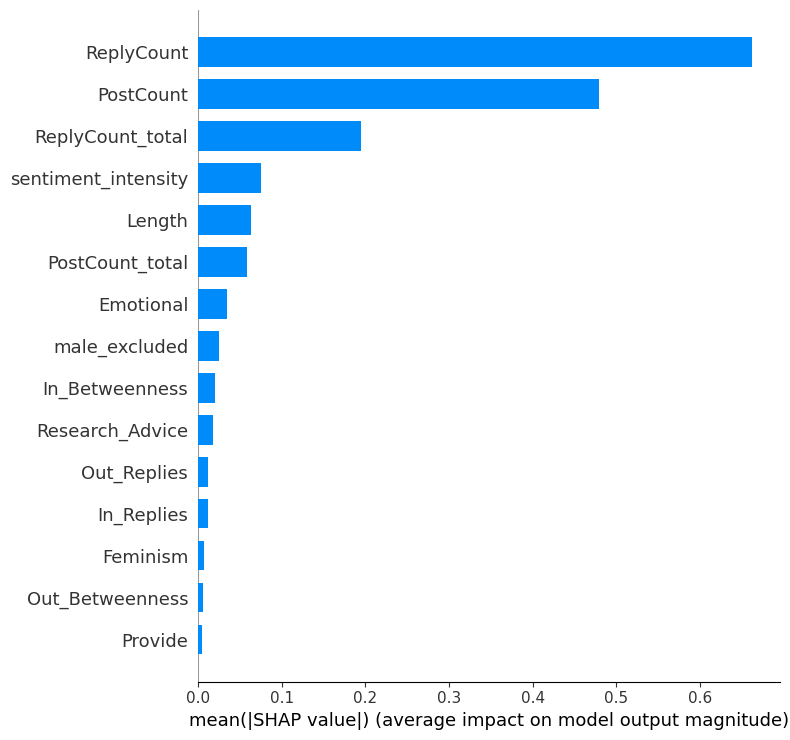

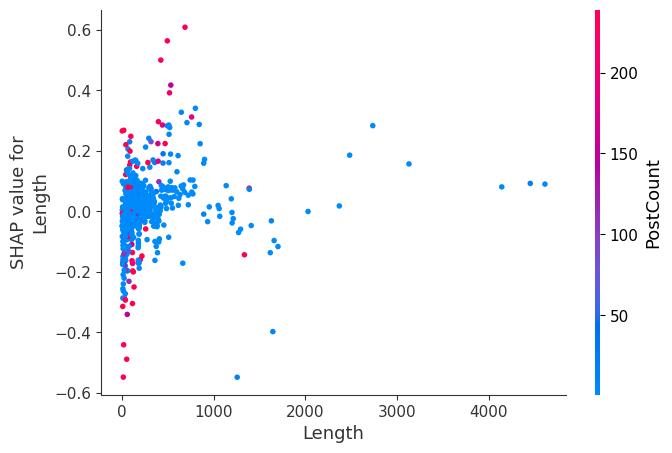

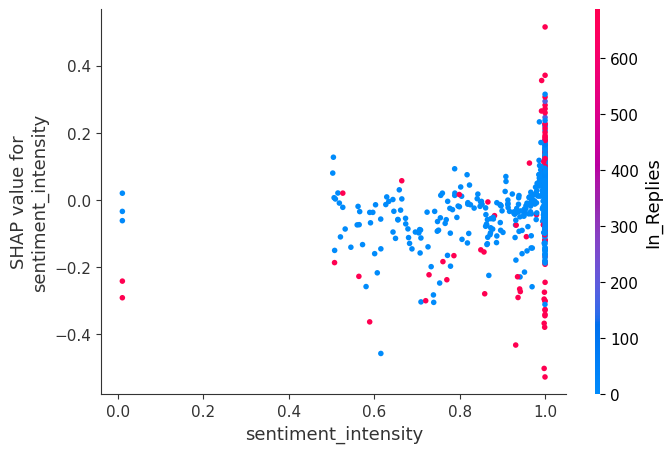

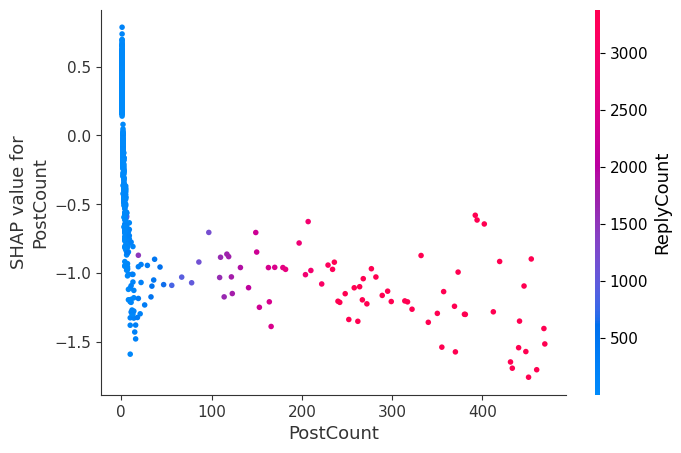

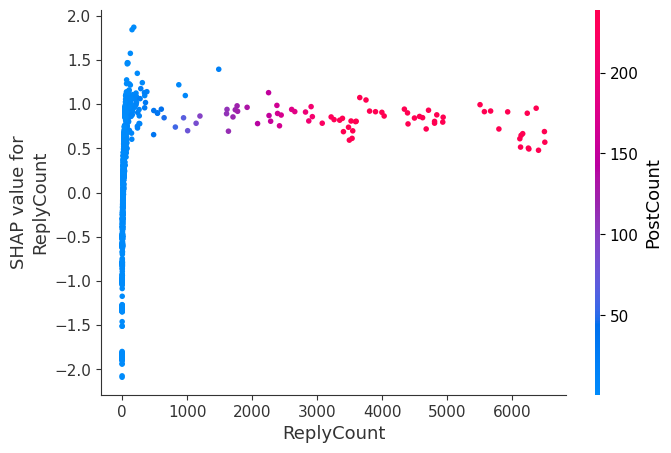

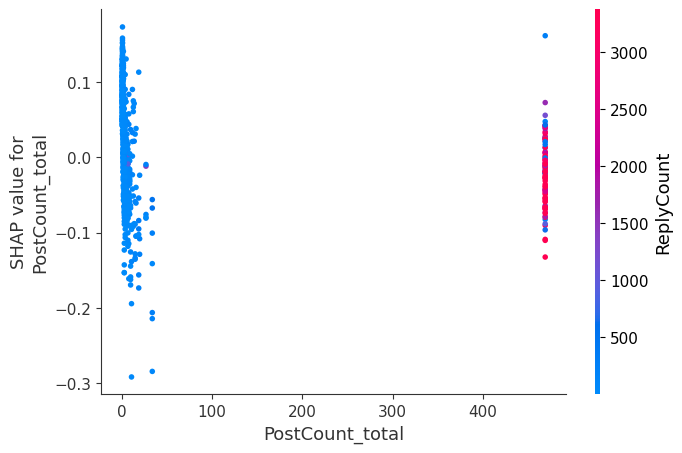

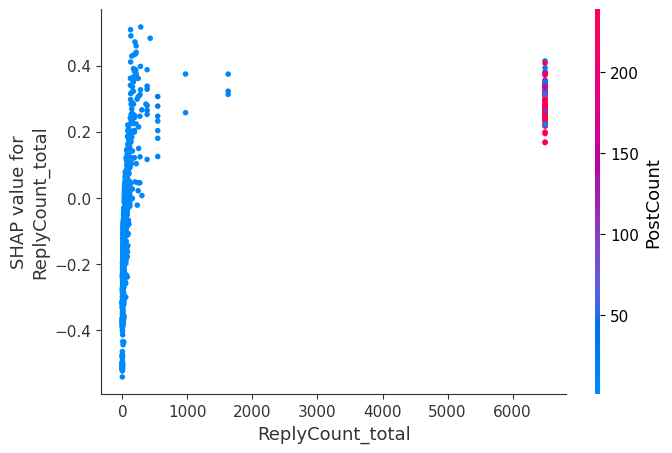

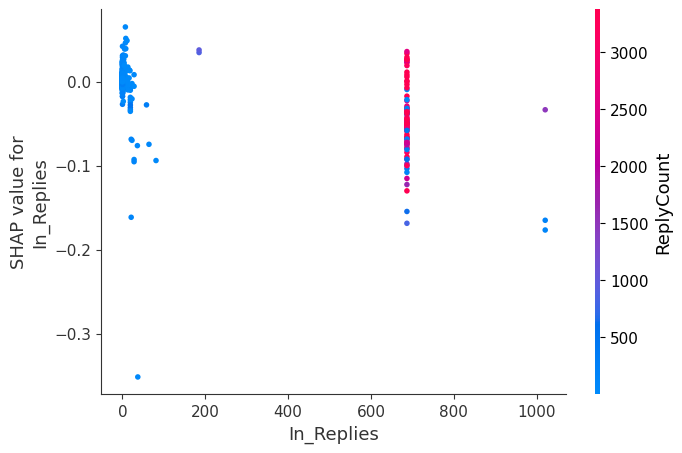

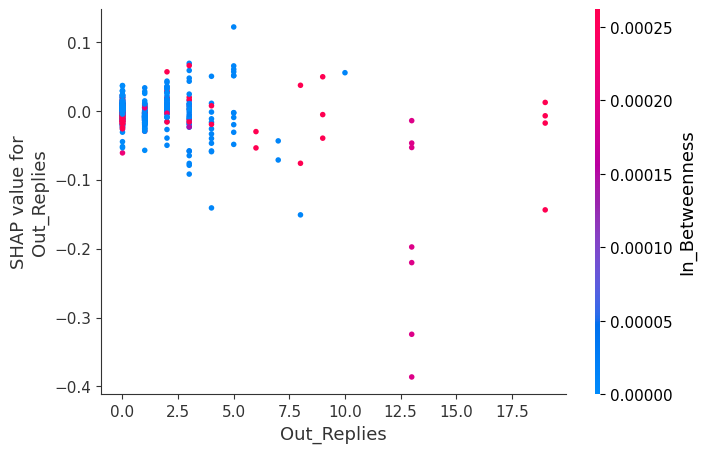

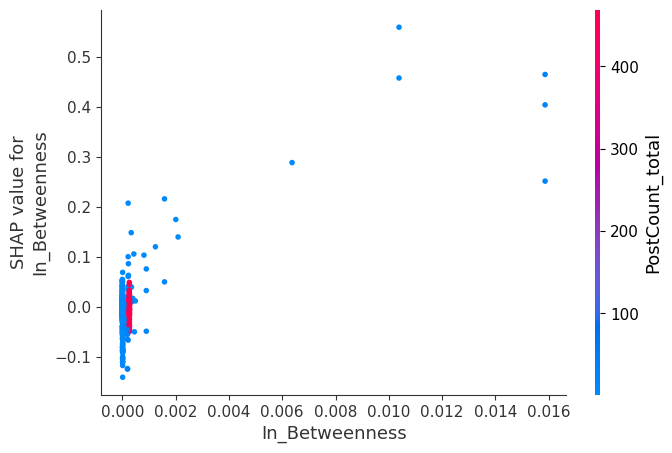

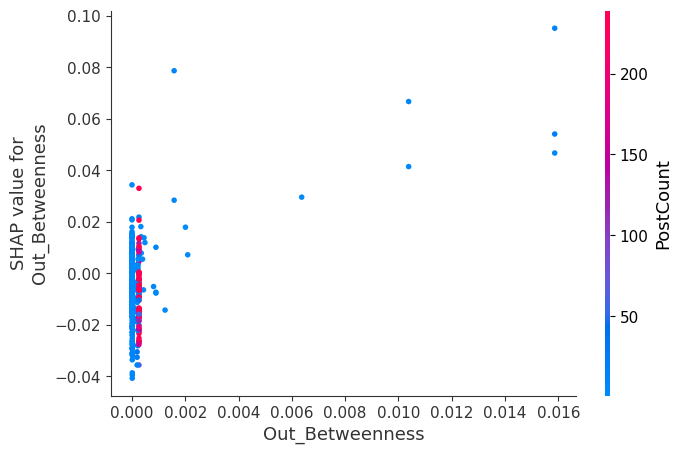

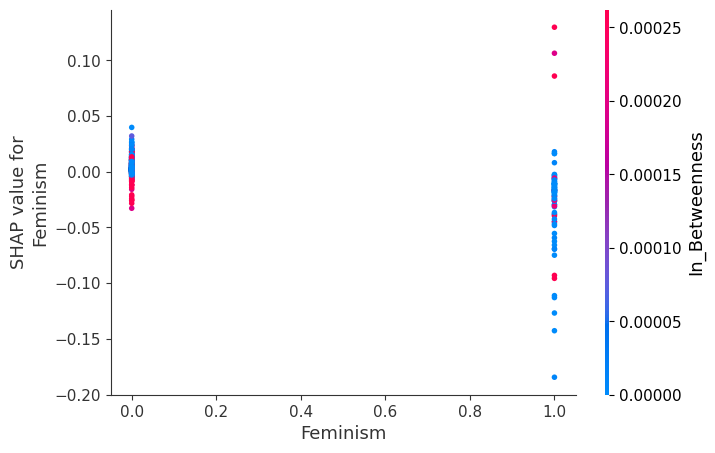

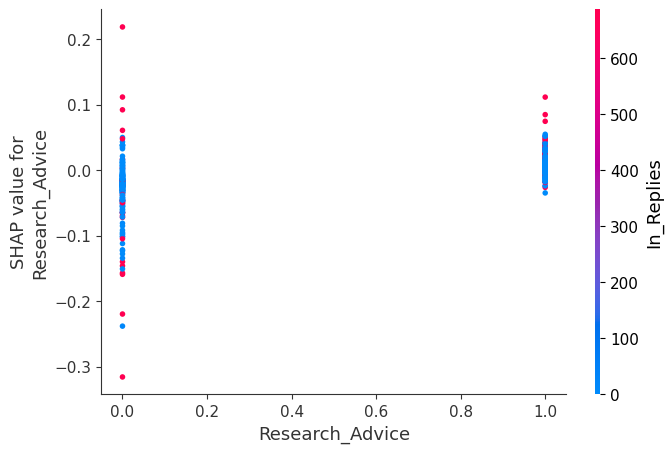

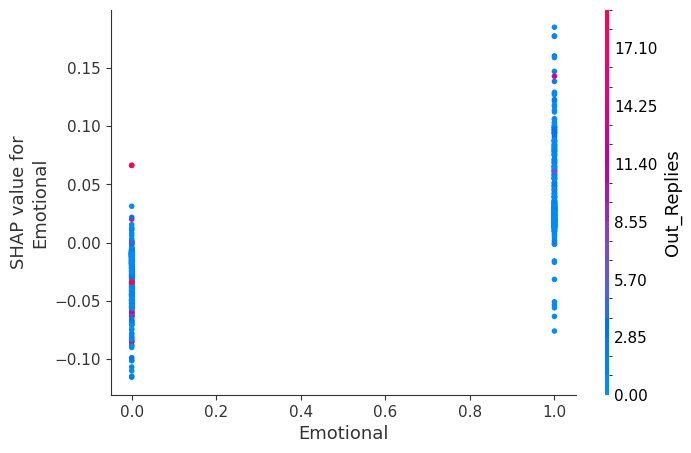

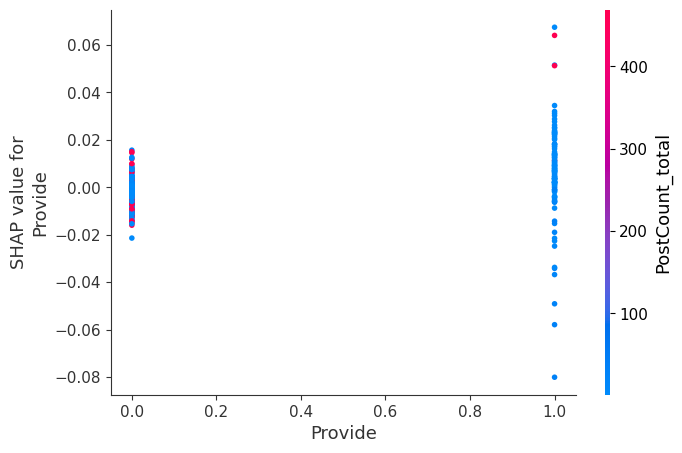

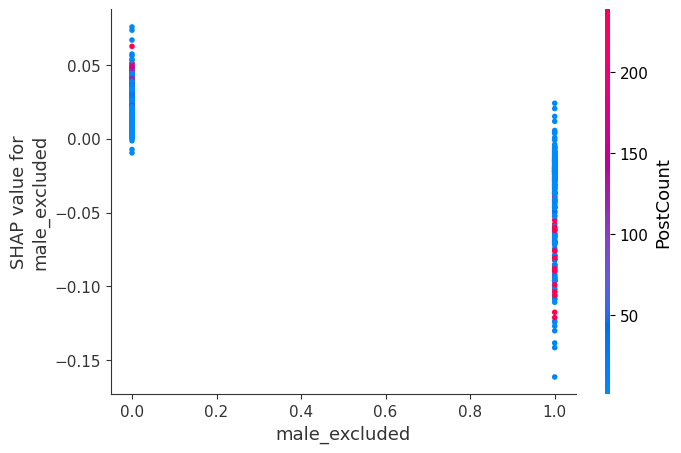

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import shap

# Define features and target
X = df[['Length', 'sentiment_intensity', 'PostCount', 'ReplyCount', 'PostCount_total', 'ReplyCount_total',
        'In_Replies', 'Out_Replies', 'In_Betweenness', 'Out_Betweenness',
        'Feminism', 'Research_Advice', 'Emotional',
        'Provide', 'male_excluded']]
y = df['Reply']

# Log-transform the long-tailed target variable
y_log = np.log1p(y)  # log1p to handle zero values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Define the XGBoost Regressor model
xgb_model = XGBRegressor(
    n_estimators=500,          # More trees for better performance
    max_depth=6,               # Medium depth for non-linear relationships
    learning_rate=0.05,        # Lower learning rate for stability
    subsample=0.8,             # Prevent overfitting
    colsample_bytree=0.8,      # Random feature sampling for generalization
    reg_lambda=1,              # L2 regularization to avoid overfitting
    reg_alpha=0,               # No L1 regularization (optional)
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log = xgb_model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Inverse log transform

# Evaluate Model Performance
mae = mean_absolute_error(np.expm1(y_test), y_pred)  # Inverse log transform for evaluation
mse = mean_squared_error(np.expm1(y_test), y_pred)
r2 = r2_score(np.expm1(y_test), y_pred)

print("📊 Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Feature Importance Analysis using SHAP
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot (Global Feature Importance)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# SHAP Dependence Plot for each important feature
for feature in X.columns:
    shap.dependence_plot(feature, shap_values, X_test)


In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [500, 1000],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_lambda': [1, 5, 10]
}

grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    verbose=2
)

grid_search.fit(X_train, y_train)
best_xgb = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=500, reg_lambda=1, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=500, reg_lambda=1, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=500, reg_lambda=1, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=500, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=500, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=500, reg_lambda=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=500, reg_lambda=5, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0

📊 Optimized XGBoost Model Performance:
Mean Absolute Error (MAE): 4.2712
Mean Squared Error (MSE): 109.0630
R-squared (R²): 0.6708


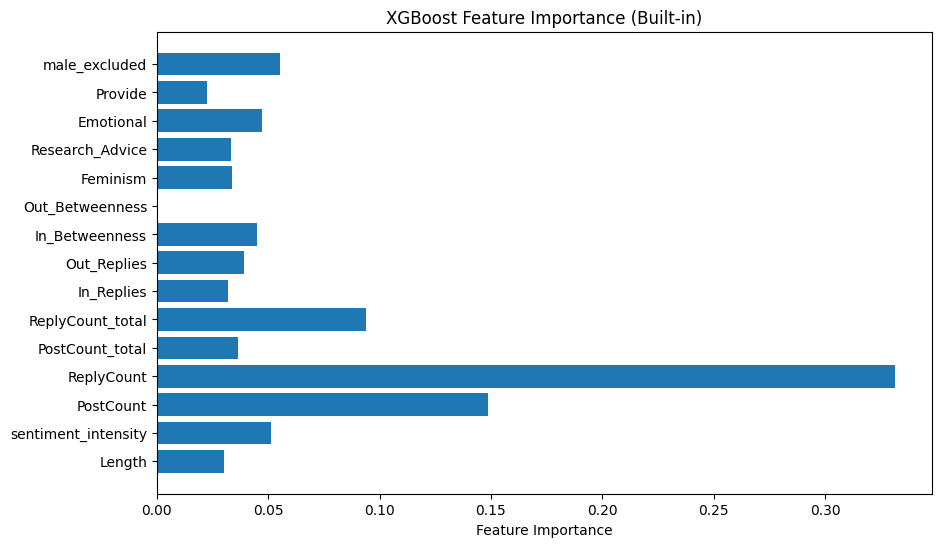

In [11]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred_log = best_xgb.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Inverse log transform

# Evaluate Model Performance
mae = mean_absolute_error(np.expm1(y_test), y_pred)  # Inverse log transform for evaluation
mse = mean_squared_error(np.expm1(y_test), y_pred)
r2 = r2_score(np.expm1(y_test), y_pred)

print("📊 Optimized XGBoost Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Feature Importance Analysis (XGBoost Built-in)
plt.figure(figsize=(10, 6))
plt.barh(X.columns, best_xgb.feature_importances_)
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance (Built-in)")
plt.show()


# Interaction Analysis

📊 XGBoost Model with Interaction Terms Performance:
Mean Absolute Error (MAE): 4.3660
Mean Squared Error (MSE): 112.7421
R-squared (R²): 0.6597


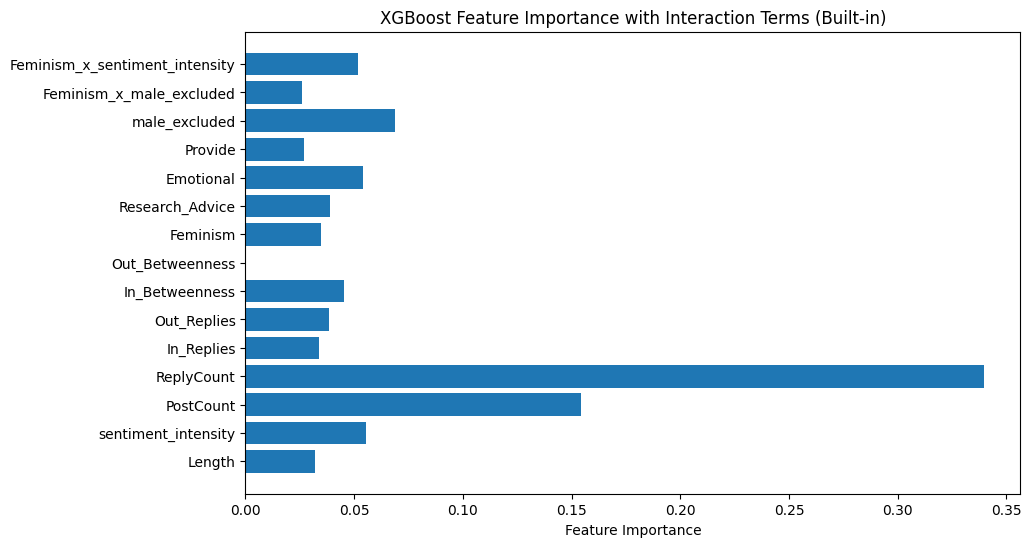

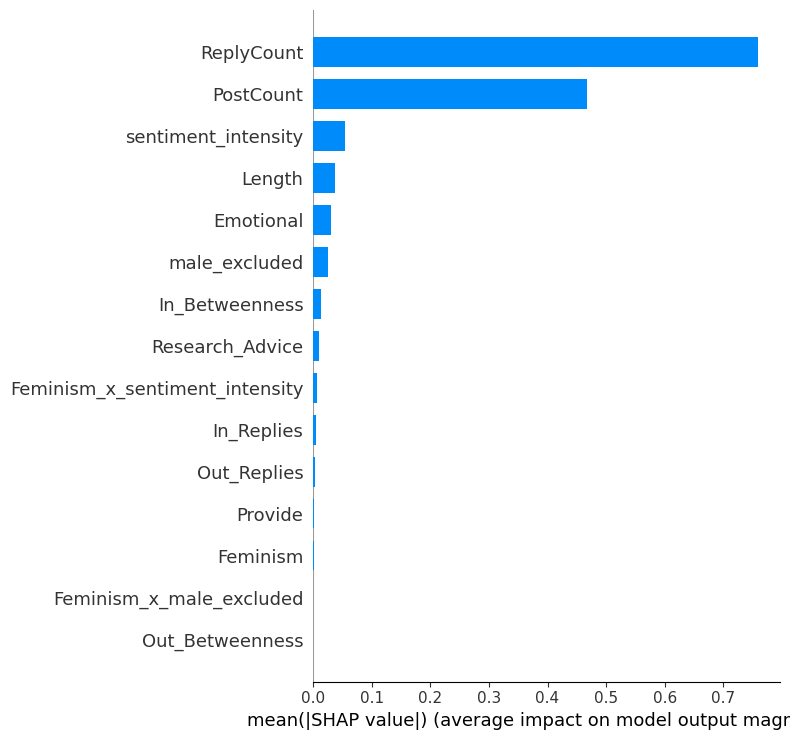

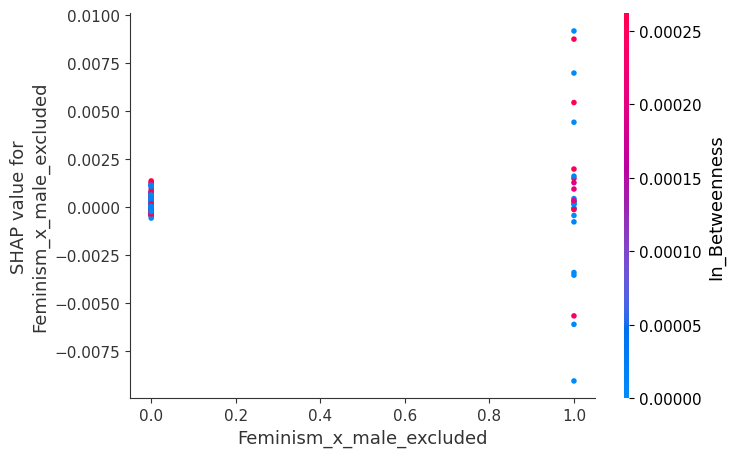

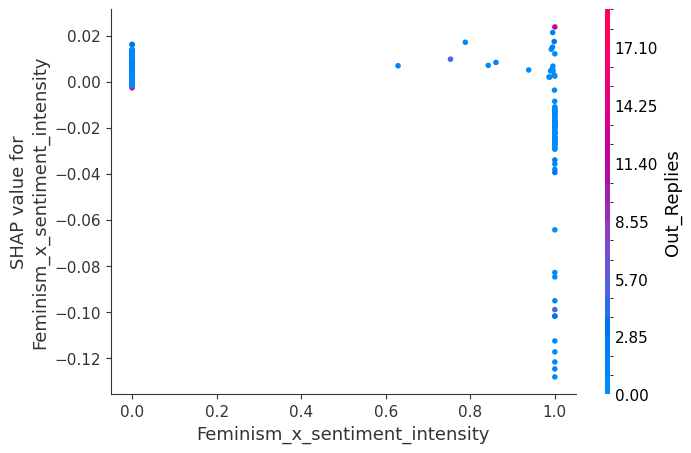

In [12]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import shap
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Add Interaction Terms
df['Feminism_x_male_excluded'] = df['Feminism'] * df['male_excluded']
df['Feminism_x_sentiment_intensity'] = df['Feminism'] * df['sentiment_intensity']

# Define features and target including interaction terms
X = df[['Length', 'sentiment_intensity', 'PostCount', 'ReplyCount',
        'In_Replies', 'Out_Replies', 'In_Betweenness', 'Out_Betweenness',
        'Feminism', 'Research_Advice', 'Emotional',
        'Provide', 'male_excluded',
        'Feminism_x_male_excluded', 'Feminism_x_sentiment_intensity']]

y = df['Reply']

# Log-transform the long-tailed target variable
y_log = np.log1p(y)  # log1p to handle zero values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Train the XGBoost Regressor with the best parameters
xgb_interaction = XGBRegressor(
    n_estimators=500,          # Best: 500 trees
    max_depth=6,               # Best: Depth of 6
    learning_rate=0.01,        # Best: Lower learning rate for stability
    subsample=0.8,             # Best: 80% of data for each tree
    colsample_bytree=1.0,      # Best: All features used per tree
    reg_lambda=10,             # Best: Strong L2 regularization to avoid overfitting
    random_state=42
)

xgb_interaction.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log = xgb_interaction.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Inverse log transform

# Evaluate Model Performance
mae = mean_absolute_error(np.expm1(y_test), y_pred)  # Inverse log transform for evaluation
mse = mean_squared_error(np.expm1(y_test), y_pred)
r2 = r2_score(np.expm1(y_test), y_pred)

print("📊 XGBoost Model with Interaction Terms Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Feature Importance Analysis (XGBoost Built-in)
plt.figure(figsize=(10, 6))
plt.barh(X.columns, xgb_interaction.feature_importances_)
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance with Interaction Terms (Built-in)")
plt.show()

# Feature Importance Analysis using SHAP
explainer = shap.TreeExplainer(xgb_interaction)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot (Global Feature Importance)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# SHAP Dependence Plot for Interaction Terms
shap.dependence_plot('Feminism_x_male_excluded', shap_values, X_test)
shap.dependence_plot('Feminism_x_sentiment_intensity', shap_values, X_test)


Based on These Results:
R² decreased and error metrics increased slightly, meaning the interaction terms did not improve predictive power.
Feature importance is low for both interaction terms.
SHAP dependence plots likely show minimal interaction effects.

📊 XGBoost Model with Adjusted Features Performance:
Mean Absolute Error (MAE): 4.3456
Mean Squared Error (MSE): 111.6024
R-squared (R²): 0.6631


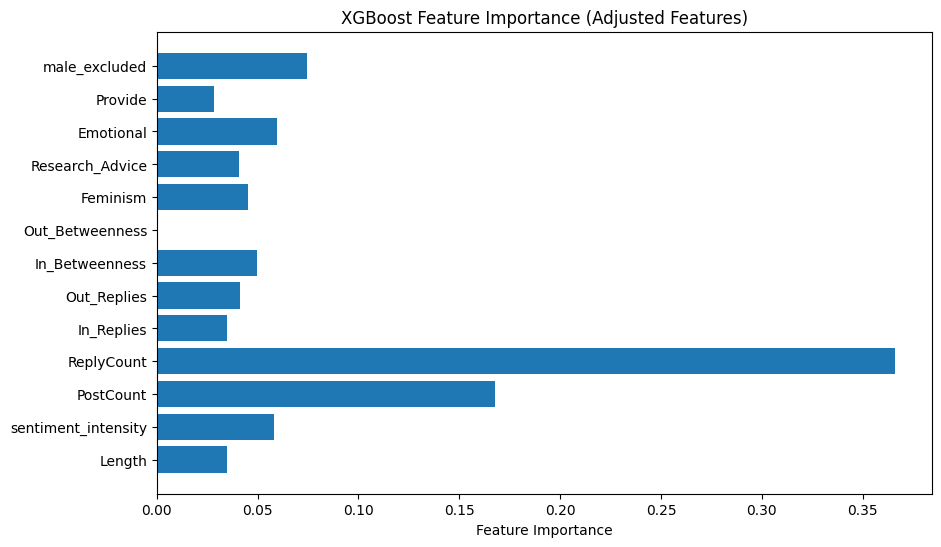

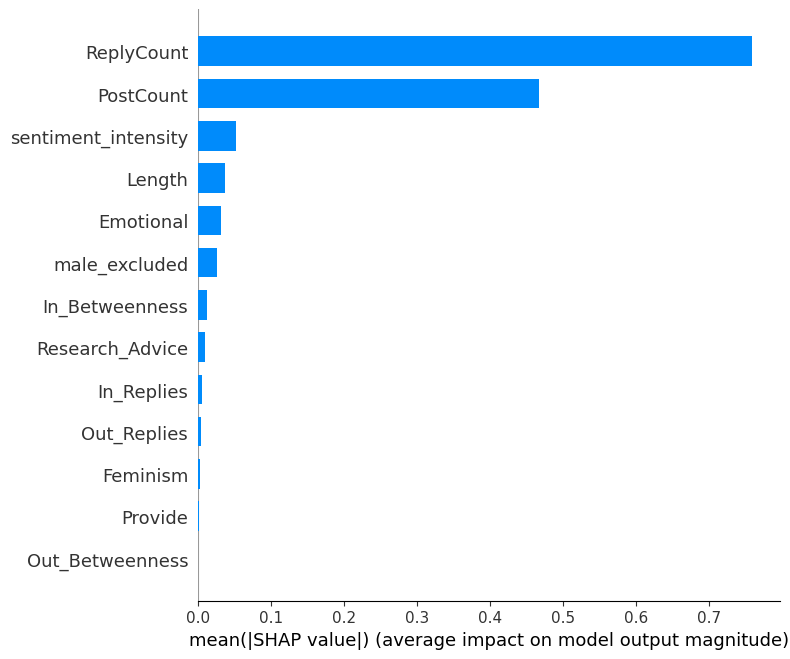

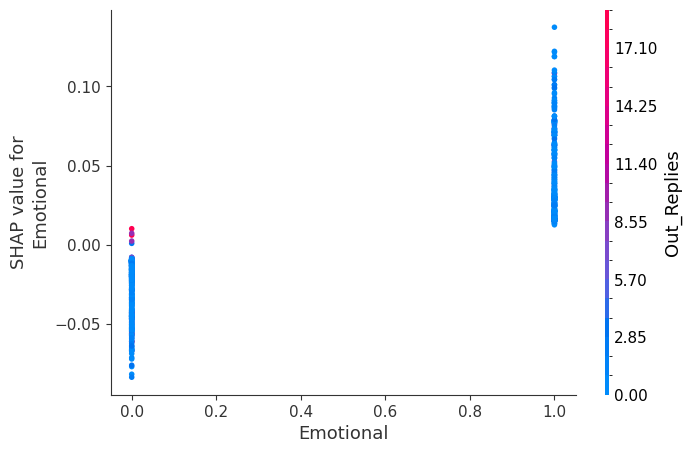

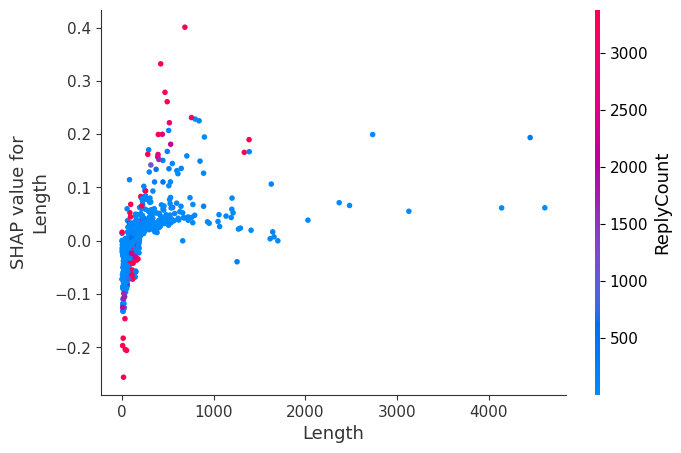

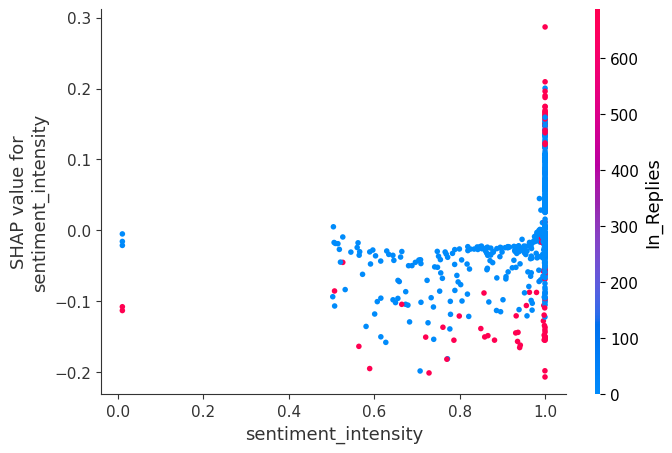

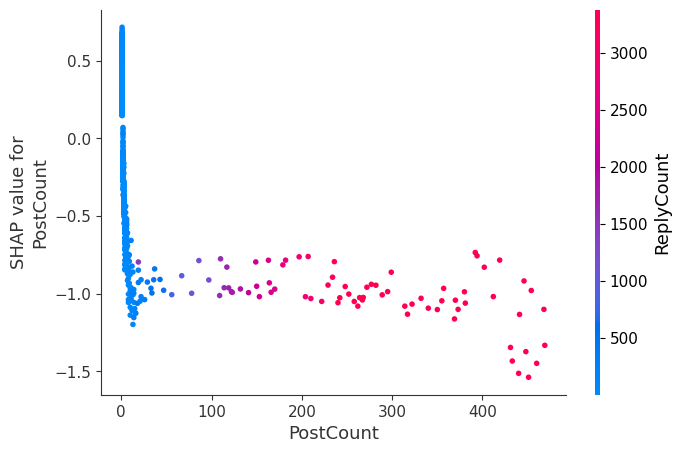

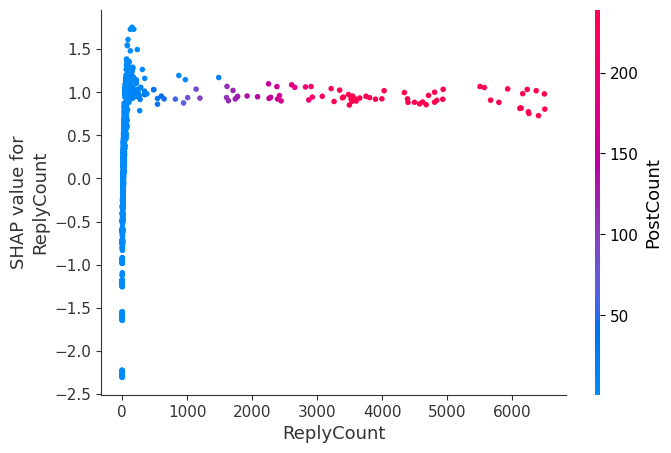

In [13]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import shap
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define adjusted features and target (without interaction terms)
X = df[['Length', 'sentiment_intensity', 'PostCount', 'ReplyCount',
        'In_Replies', 'Out_Replies', 'In_Betweenness', 'Out_Betweenness',
        'Feminism', 'Research_Advice', 'Emotional',
        'Provide', 'male_excluded']]

y = df['Reply']

# Log-transform the long-tailed target variable
y_log = np.log1p(y)  # log1p to handle zero values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Train the XGBoost Regressor with the best parameters
xgb_adjusted = XGBRegressor(
    n_estimators=500,          # Best: 500 trees
    max_depth=6,               # Best: Depth of 6
    learning_rate=0.01,        # Best: Lower learning rate for stability
    subsample=0.8,             # Best: 80% of data for each tree
    colsample_bytree=1.0,      # Best: All features used per tree
    reg_lambda=10,             # Best: Strong L2 regularization to avoid overfitting
    random_state=42
)

xgb_adjusted.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log = xgb_adjusted.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Inverse log transform

# Evaluate Model Performance
mae = mean_absolute_error(np.expm1(y_test), y_pred)  # Inverse log transform for evaluation
mse = mean_squared_error(np.expm1(y_test), y_pred)
r2 = r2_score(np.expm1(y_test), y_pred)

print("📊 XGBoost Model with Adjusted Features Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Feature Importance Analysis (XGBoost Built-in)
plt.figure(figsize=(10, 6))
plt.barh(X.columns, xgb_adjusted.feature_importances_)
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance (Adjusted Features)")
plt.show()

# Feature Importance Analysis using SHAP
explainer = shap.TreeExplainer(xgb_adjusted)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot (Global Feature Importance)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# SHAP Dependence Plot for Top 5 Important Features
top_features = np.argsort(np.abs(shap_values).mean(0))[-5:]  # Top 5 important features
for feature in X.columns[top_features]:
    shap.dependence_plot(feature, shap_values, X_test)


📊 XGBoost Feature Importance (Descending Order):
                Feature  Importance
3            ReplyCount    0.366041
2             PostCount    0.167471
12        male_excluded    0.074675
10            Emotional    0.059436
1   sentiment_intensity    0.058286
6        In_Betweenness    0.049535
8              Feminism    0.044961
5           Out_Replies    0.041207
9       Research_Advice    0.040689
0                Length    0.034620
4            In_Replies    0.034562
11              Provide    0.028518
7       Out_Betweenness    0.000000


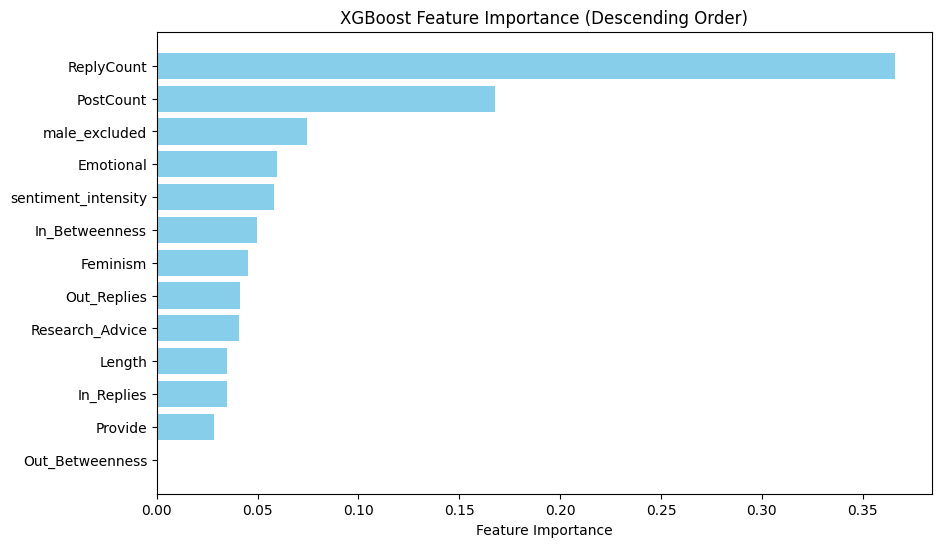

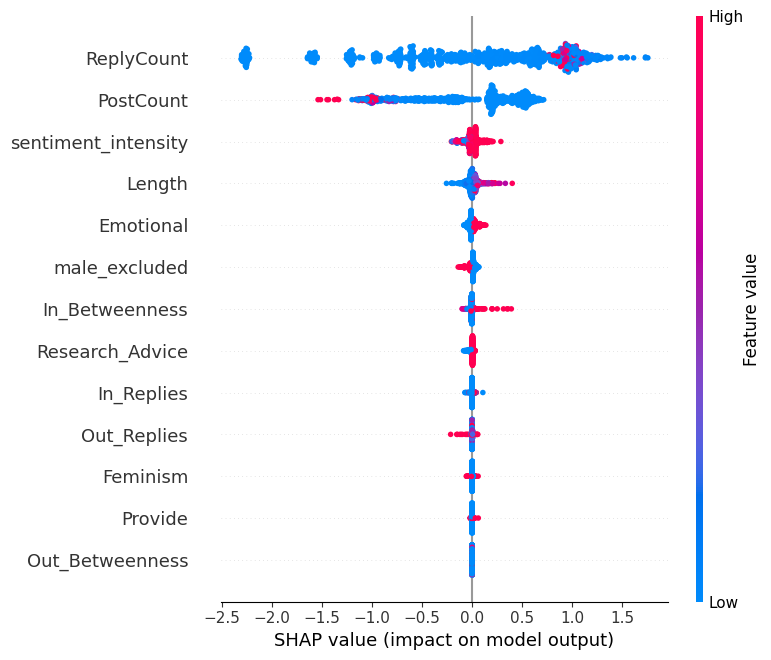

In [14]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import shap
import pandas as pd

# Get feature importance from XGBoost
feature_importance = xgb_adjusted.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort the DataFrame in descending order of importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display Feature Importance in Descending Order
print("📊 XGBoost Feature Importance (Descending Order):")
print(importance_df)

# Plot Feature Importance in Descending Order
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance (Descending Order)")
plt.gca().invert_yaxis()  # Invert y-axis to show most important at the top
plt.show()

# SHAP Analysis for Positive and Negative Influence
explainer = shap.TreeExplainer(xgb_adjusted)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot to show Positive/Negative Influence
shap.summary_plot(shap_values, X_test, plot_type="dot")


Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=500, reg_lambda=1, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=500, reg_lambda=1, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=500, reg_lambda=1, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=500, reg_lambda=1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=500, reg_lambda=1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=500, reg_lambda=1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=500, reg_lambda=5, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0

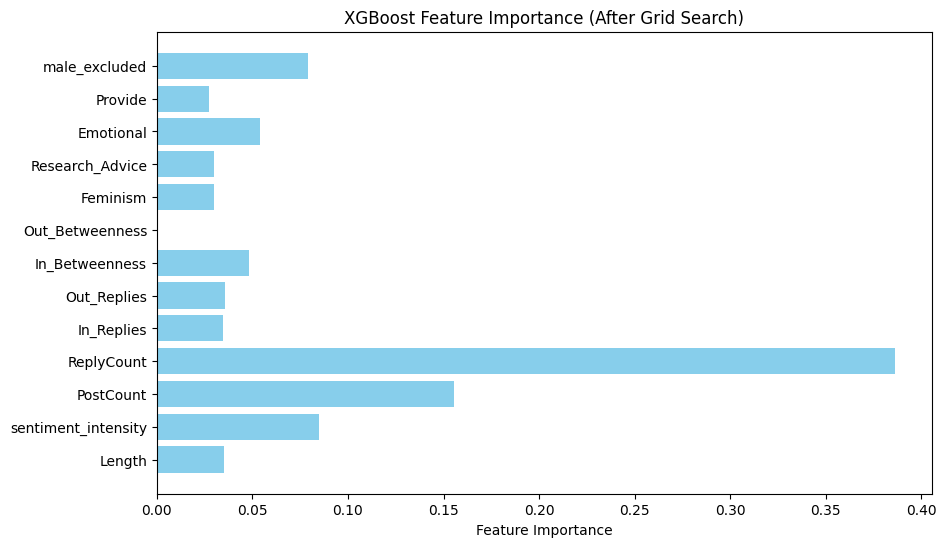

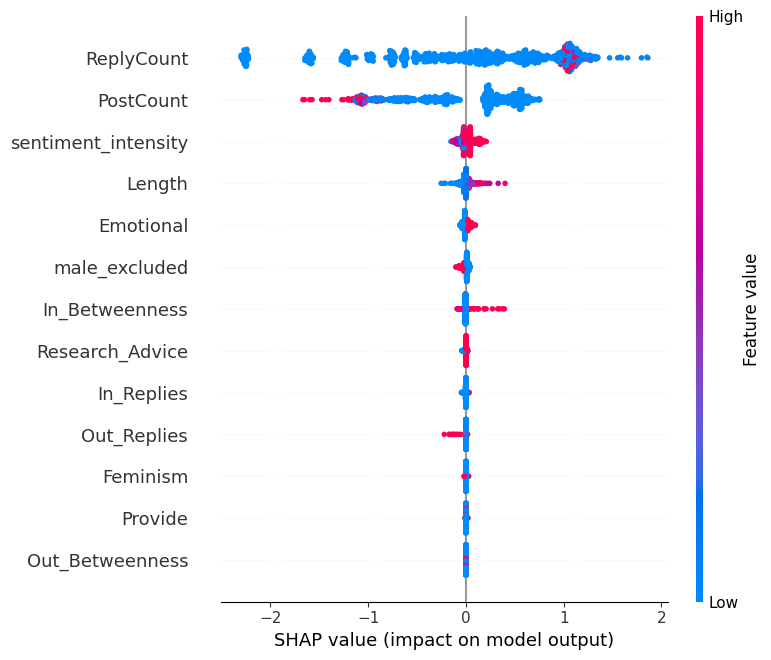

In [15]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features and target (adjusted feature set)
X = df[['Length', 'sentiment_intensity', 'PostCount', 'ReplyCount',
        'In_Replies', 'Out_Replies', 'In_Betweenness', 'Out_Betweenness',
        'Feminism', 'Research_Advice', 'Emotional',
        'Provide', 'male_excluded']]
y = df['Reply']

# Log-transform the long-tailed target variable
y_log = np.log1p(y)  # log1p to handle zero values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [500, 1000],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_lambda': [1, 5, 10]
}

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)

# Perform Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    verbose=2
)

# Fit Grid Search on Training Data
grid_search.fit(X_train, y_train)

# Get the Best Model and Parameters
best_xgb = grid_search.best_estimator_
best_params = grid_search.best_params_
print("🚀 Best Parameters from Grid Search:", best_params)

# Make Predictions using the Best Model
y_pred_log = best_xgb.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Inverse log transform

# Evaluate Model Performance
mae = mean_absolute_error(np.expm1(y_test), y_pred)  # Inverse log transform for evaluation
mse = mean_squared_error(np.expm1(y_test), y_pred)
r2 = r2_score(np.expm1(y_test), y_pred)

print("📊 XGBoost Model Performance (After Grid Search):")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Feature Importance Analysis (XGBoost Built-in)
plt.figure(figsize=(10, 6))
plt.barh(X.columns, best_xgb.feature_importances_, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance (After Grid Search)")
plt.show()

# SHAP Analysis for Positive and Negative Influence
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot to show Positive/Negative Influence
shap.summary_plot(shap_values, X_test, plot_type="dot")


📊 XGBoost Feature Importance (Descending Order):
                Feature  Importance
3            ReplyCount    0.386226
2             PostCount    0.155381
1   sentiment_intensity    0.084662
12        male_excluded    0.079155
10            Emotional    0.054036
6        In_Betweenness    0.048124
5           Out_Replies    0.035731
0                Length    0.035037
4            In_Replies    0.034372
8              Feminism    0.030013
9       Research_Advice    0.029923
11              Provide    0.027340
7       Out_Betweenness    0.000000


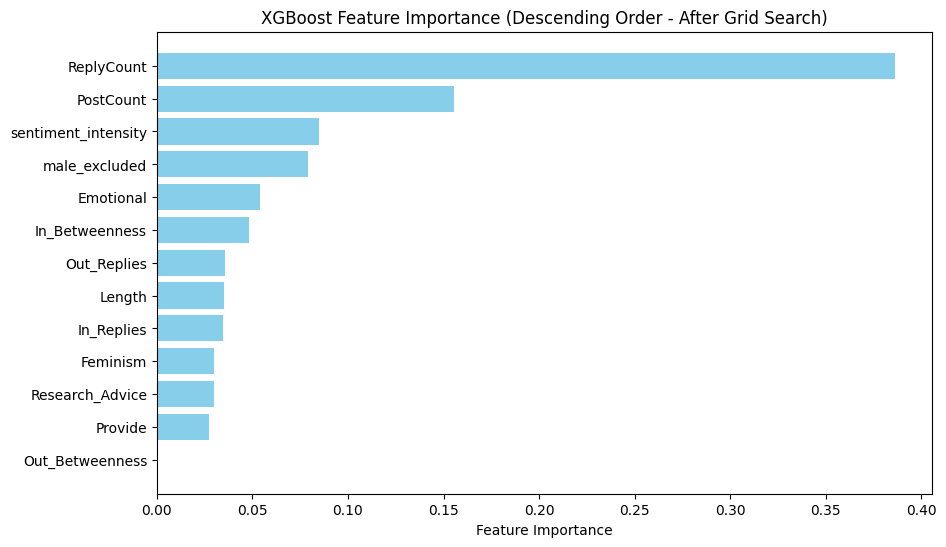

In [16]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance from the best model after Grid Search
feature_importance = best_xgb.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort the DataFrame in descending order of importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display Feature Importance in Descending Order
print("📊 XGBoost Feature Importance (Descending Order):")
print(importance_df)

# Plot Feature Importance in Descending Order
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance (Descending Order - After Grid Search)")
plt.gca().invert_yaxis()  # Invert y-axis to show most important at the top
plt.show()


📊 XGBoost Model Performance (With Interaction Terms):
Mean Absolute Error (MAE): 4.2852
Mean Squared Error (MSE): 102.9566
R-squared (R²): 0.6892


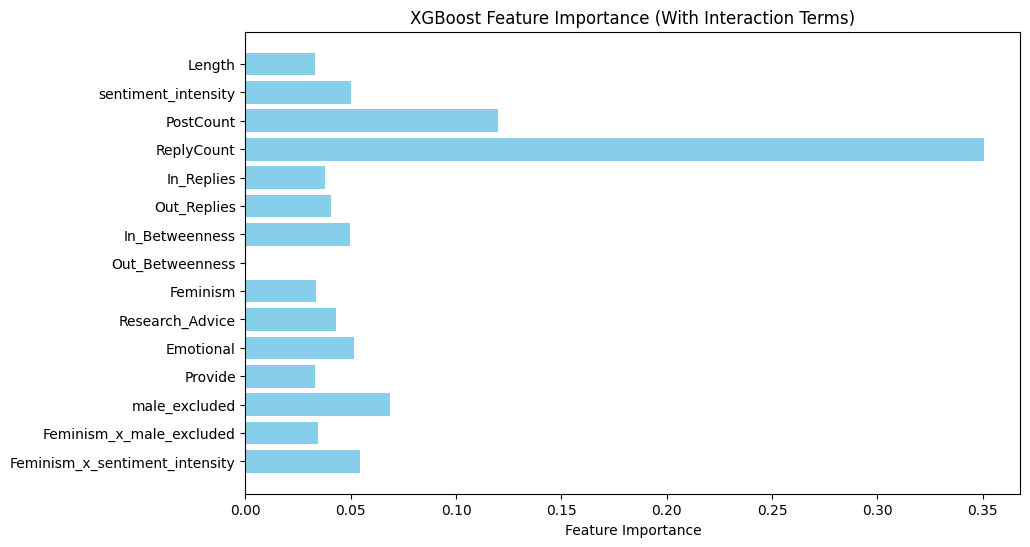

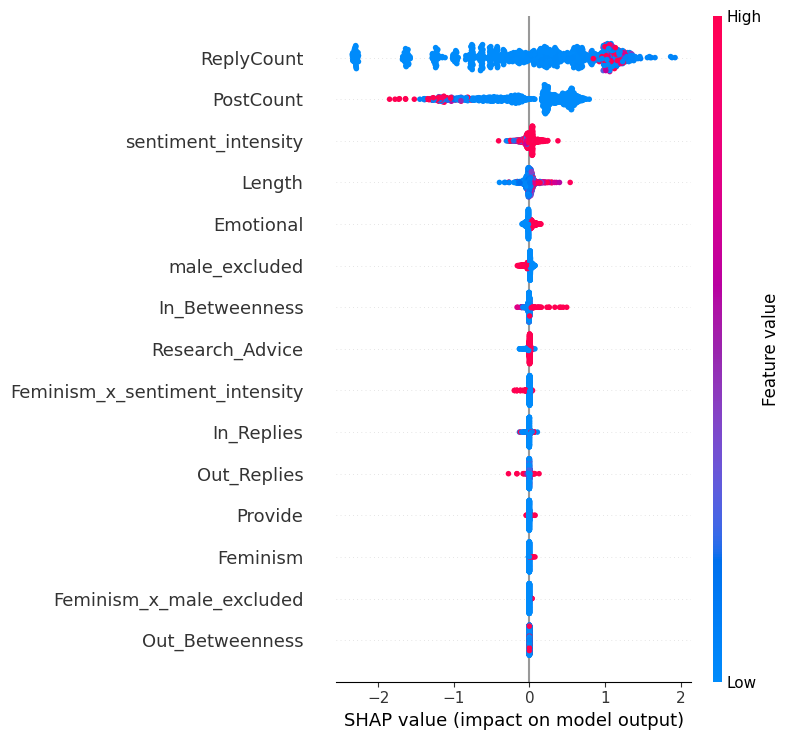

In [17]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import shap
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create Interaction Terms
df['Feminism_x_male_excluded'] = df['Feminism'] * df['male_excluded']
df['Feminism_x_sentiment_intensity'] = df['Feminism'] * df['sentiment_intensity']

# Define features and target (including interaction terms)
X = df[['Length', 'sentiment_intensity', 'PostCount', 'ReplyCount',
        'In_Replies', 'Out_Replies', 'In_Betweenness', 'Out_Betweenness',
        'Feminism', 'Research_Advice', 'Emotional',
        'Provide', 'male_excluded',
        'Feminism_x_male_excluded', 'Feminism_x_sentiment_intensity']]
y = df['Reply']

# Log-transform the long-tailed target variable
y_log = np.log1p(y)  # log1p to handle zero values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Train the XGBoost Regressor with the best parameters from Grid Search
xgb_interaction = XGBRegressor(
    n_estimators=1000,
    max_depth=6,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=1.0,
    reg_lambda=10,
    random_state=42
)

xgb_interaction.fit(X_train, y_train)

# Make Predictions using the Interaction Model
y_pred_log = xgb_interaction.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Inverse log transform

# Evaluate Model Performance
mae = mean_absolute_error(np.expm1(y_test), y_pred)  # Inverse log transform for evaluation
mse = mean_squared_error(np.expm1(y_test), y_pred)
r2 = r2_score(np.expm1(y_test), y_pred)

print("📊 XGBoost Model Performance (With Interaction Terms):")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Feature Importance Analysis (XGBoost Built-in)
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, xgb_interaction.feature_importances_, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance (With Interaction Terms)")
plt.gca().invert_yaxis()  # Invert y-axis to show most important at the top
plt.show()

# SHAP Analysis for Positive and Negative Influence
explainer = shap.TreeExplainer(xgb_interaction)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot to show Positive/Negative Influence
shap.summary_plot(shap_values, X_test, plot_type="dot")


XGBoost Feature Importance (With Interaction Terms - Descending Order):
                           Feature  Importance
3                       ReplyCount    0.350394
2                        PostCount    0.119938
12                   male_excluded    0.068693
14  Feminism_x_sentiment_intensity    0.054461
10                       Emotional    0.051729
1              sentiment_intensity    0.050068
6                   In_Betweenness    0.049493
9                  Research_Advice    0.043159
5                      Out_Replies    0.040376
4                       In_Replies    0.037572
13        Feminism_x_male_excluded    0.034281
8                         Feminism    0.033622
0                           Length    0.033169
11                         Provide    0.033045
7                  Out_Betweenness    0.000000


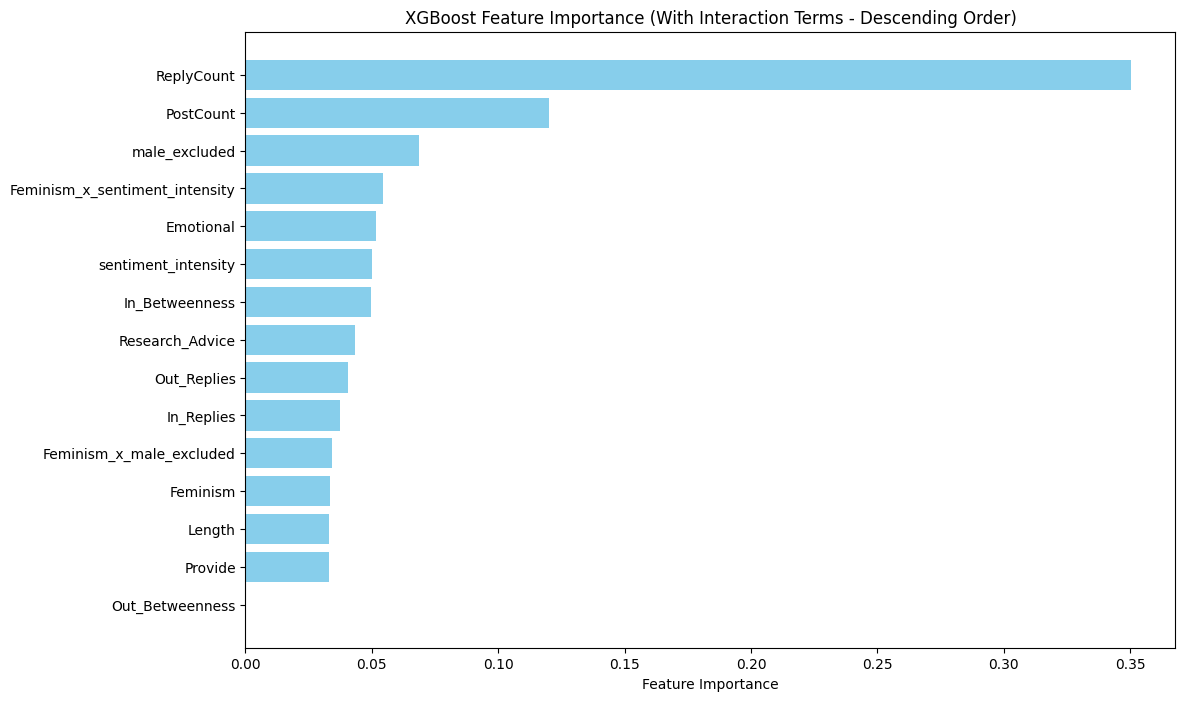

In [18]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance from the last model with interaction terms
feature_importance = xgb_interaction.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort the DataFrame in descending order of importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display Feature Importance in Descending Order
print("XGBoost Feature Importance (With Interaction Terms - Descending Order):")
print(importance_df)

# Plot Feature Importance in Descending Order
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance (With Interaction Terms - Descending Order)")
plt.gca().invert_yaxis()  # Invert y-axis to show most important at the top
plt.show()
